<a href="https://colab.research.google.com/github/Swastik02aug/SML-Regression-Capstone-Project/blob/main/project(yes_bank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 2 - Yes Bank Stock Closing Price Prediction**
# (Supervised - Regression)

## Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.


**Importing all required libraries.**

In [1]:
# importing the required libraries
import warnings                                        # do not disturb mode
warnings.filterwarnings('ignore')

import numpy as np                                     # numerical computations
import pandas as pd                                    # data manipulations

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px                       

from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA
from prophet import Prophet                          # to build prophet

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [2]:
#mounting drive for importing data set from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/capstone project 2(yes bank)/data_YesBank_StockPrices.csv')

**WRANGLING OF THE DATA:**

In [4]:
#HEAD FUCTION IS USED TO PRINT OUT THE FIRST FIVE ROWS OF THRE DATA SETS
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
#DESCRIBE METHOD IS USE PROVIDES THE COUNT ,MEAN,MEDIAN,,STD,MIN ETC VALUES
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [6]:
#NUNIQUE IS USED TO PROVIDES THE NUMBERS OF UNIQUES VALUES PRESENT IN EACH COLUMN
dataset.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [7]:
#DTYPES IS USED TO PROVIDES DATA TYPES OF EACH COLUMN VALUE
dataset.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [8]:
#INFO IS USED TO PROVIDES COUNT,DTYPE,AND NULL OR NON COLUMN VALUES
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
#IT IS USED TO FIND OUT THE SUM OF ALL NULL VALUES
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**->**From the given data set we find that there is no null values are present .

In [10]:
#IT IS USED TO FIND OT THE NUMBERS OF ROWS AND COLUMN OF THE DATA
dataset.shape

(185, 5)

**->**From the given data set we find that there are 185 rows and 5 columns .And all the given values are integer and float except date(object i.e; string) ,so we have to covert that into date format.

In [10]:
# convert string object to datetime object
dataset['Date'] = dataset['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [ ]:
dataset['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [11]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


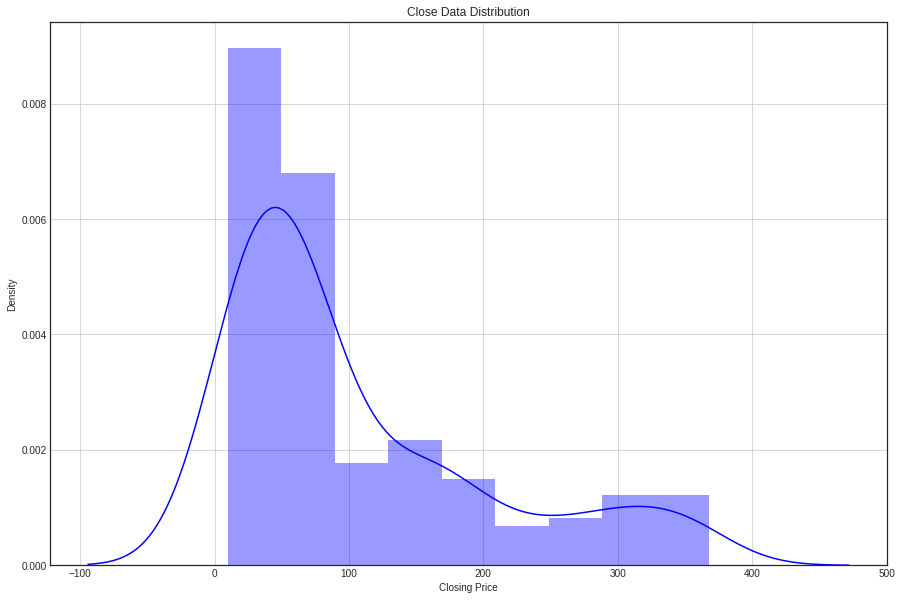

In [12]:
# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.grid()
plt.show()

**->**From the distribution plot of the dependent variable 'close' price we find that 'close' price distribution curve is slighltly left skewed.

In [13]:
#finding month wise distribution of close price
fig = px.line(dataset,dataset['Date'], dataset['Close'], title='Monthly closing price')
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Closing price'),
    autosize=False,
    width=1400,
    height=400)

fig.show()

**->**From the plot we find the closing price is high between the year 2016 to 2020.

Index(['Open', 'High', 'Low', 'Close'], dtype='object')


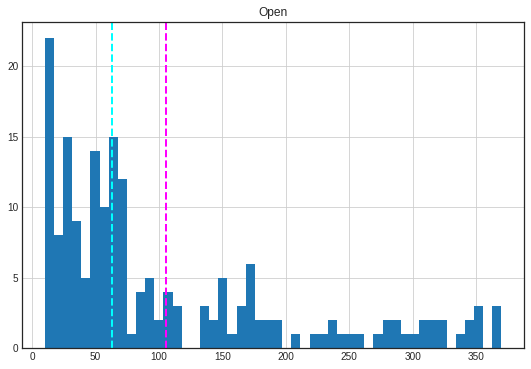

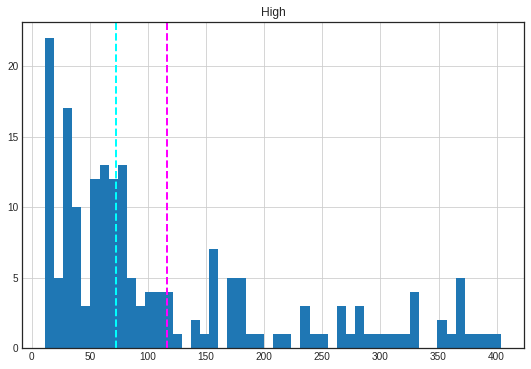

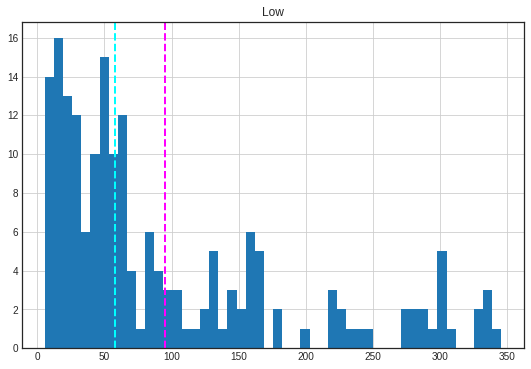

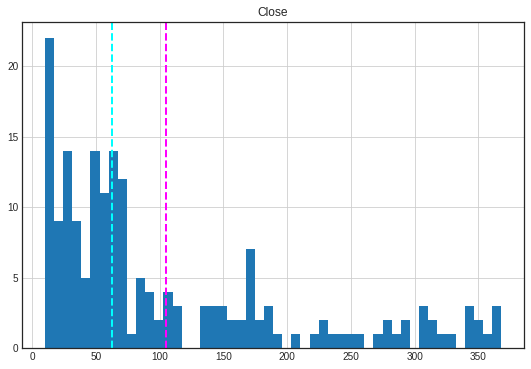

In [14]:
# Check for skewness in the dataset
numeric_features = dataset.describe().columns
print(numeric_features)
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

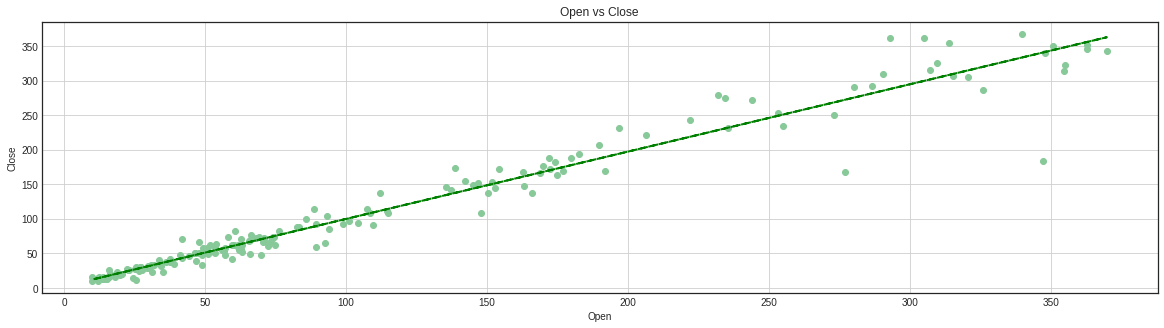

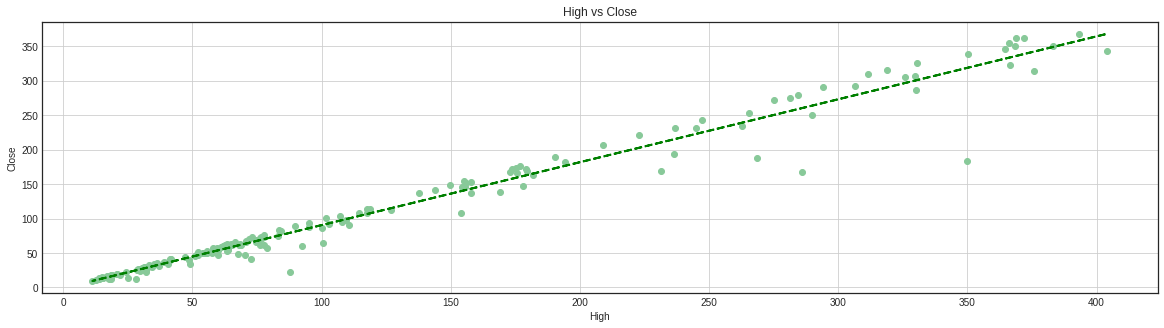

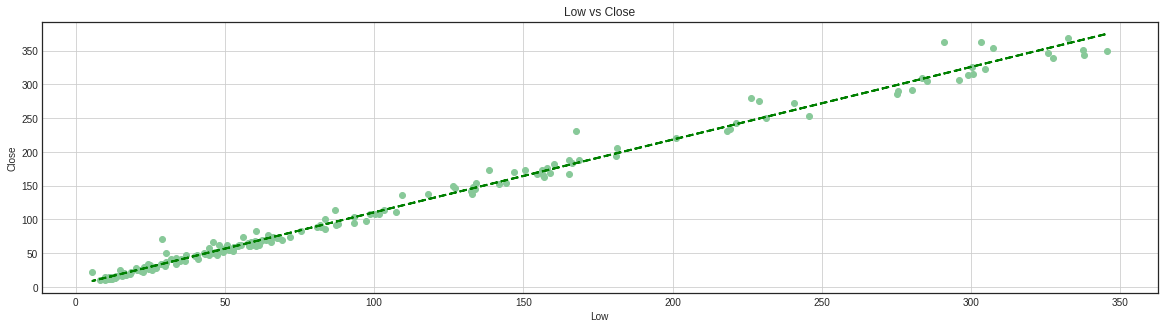

In [15]:
# scatter plot to see the relationship between dependent & independent variables
for col in dataset.describe().columns[:-1]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()

  plt.scatter(dataset[col], dataset['Close'], color = '#88c999')
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))

  z = np.polyfit(dataset[col],dataset['Close'], 1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col], y_hat, "g--", lw=2)
  plt.grid()

  plt.show()

**->**From all the scatter plot we find that each independent variable are changes linearly with dependent variable.

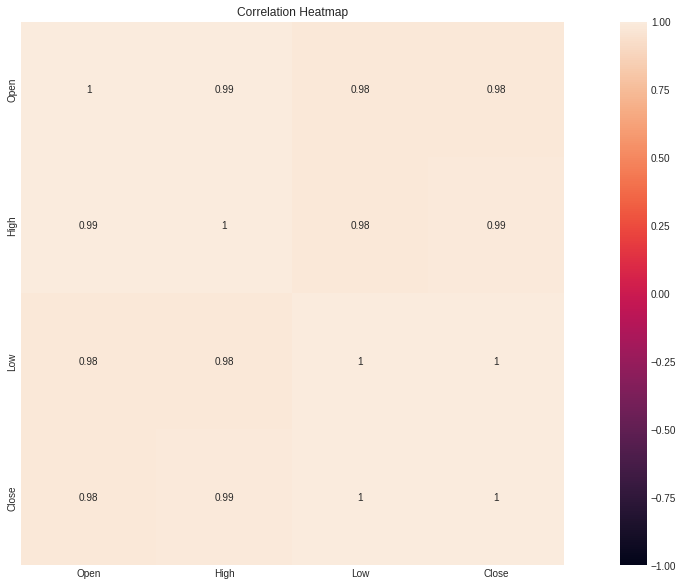

In [16]:
# check for existence of corelation
plt.figure(figsize=(20,10))
plt.title('Correlation Heatmap')
cor = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap=None, annot=True,square=True )

**->**From the heat map we find correlation between the independent variables.

**->**Hence all the independent variable are highly correlated with each other,so we takes any one variables from them.

In [17]:
# Creating a new feature based on average of other features in the dataset
dataset['im'] = dataset[['Open', 'High', 'Low']].mean(axis=1).round(2)
dataset.head()

,Date,Open,High,Low,Close,im
0,Jul-05,13.00,14.00,11.25,12.46,12.75
1,Aug-05,12.58,14.88,12.55,13.42,13.34
2,Sep-05,13.48,14.87,12.27,13.30,13.54
3,Oct-05,13.20,14.47,12.40,12.99,13.36
4,Nov-05,13.35,13.88,12.88,13.41,13.37


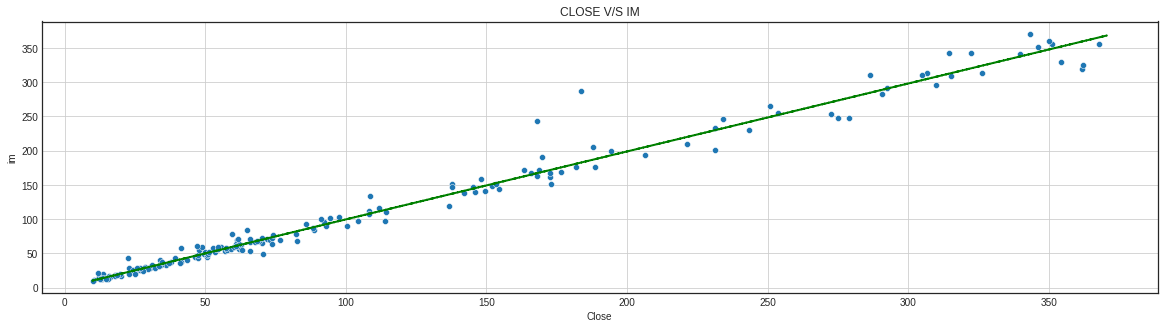

In [18]:
#ploting the scatter plot b/w dependent and independent variables
plt.figure(figsize=(20,5))
plt.title('CLOSE V/S IM')

sns.scatterplot(dataset['Close'],dataset['im'])

z = np.polyfit(dataset['im'],dataset['Close'], 1)
y_hat = np.poly1d(z)(dataset['im'])
plt.plot(dataset['im'], y_hat, "g--", lw=2)
plt.grid()
plt.show()


**->**SCATTER PLOT IS TO REPRESENT THE LINEARITY B/W THE DEPENDENT AND INDEPENDENT VARIABLES.

->And linearity between the 'im' and 'close'is high.

To reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model. This is a good solution when each predictor contributes to predict the dependent variable.

# **Train test split**



In [19]:
# Hence the given data is small in size so it necesssary to performs 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)

In [20]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [21]:
# choose appropriate dependent and independent variables
y = dataset.dropna().Close
X = dataset.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

In [22]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

# **Model Building**

**Implementing linear regression model**

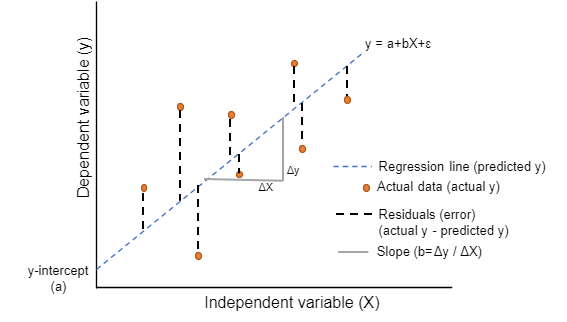

In [23]:
# initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

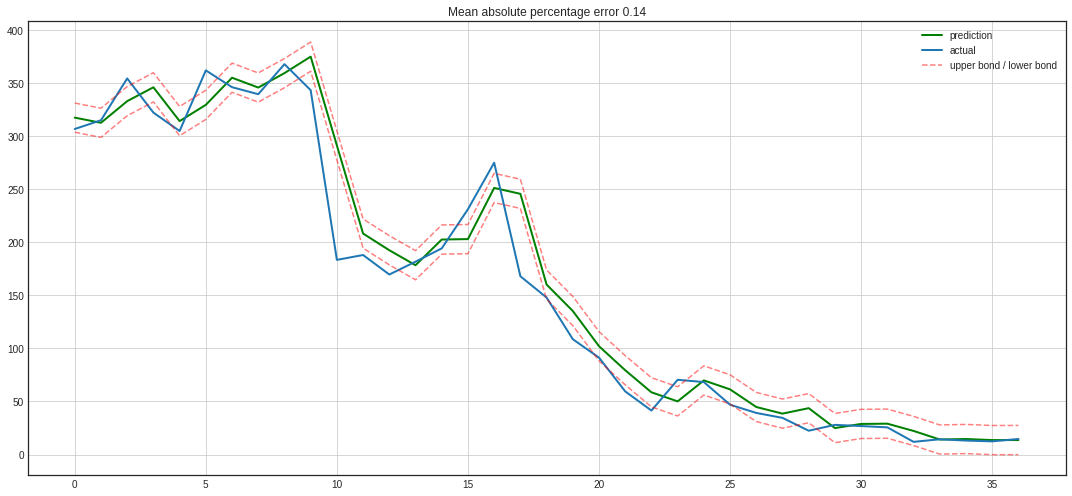

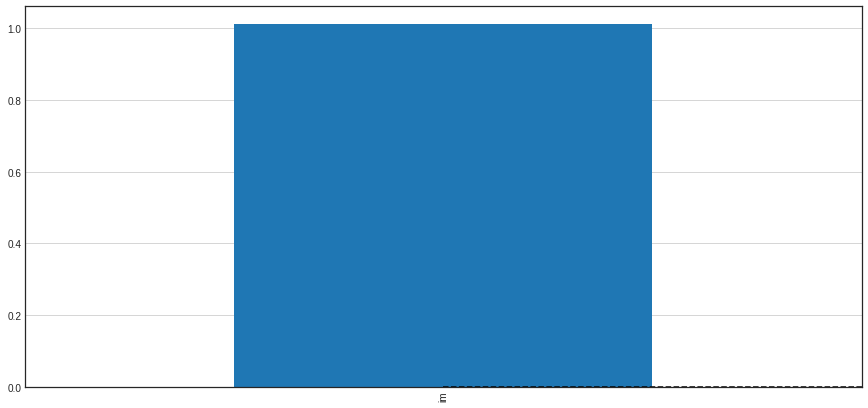

In [24]:
# function to plot model performance
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    # function to plot coefficients   
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

mean absolute error: 16.87

mean squared error: 714.43

root mean squared error: 26.73

r2_score: 0.96

mean absolute percentage error: 0.14





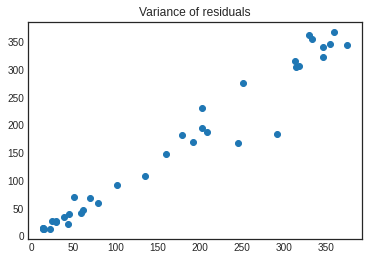

In [25]:
# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

->From the output we find that mean absolute error,mean squared error,root mean squared error are very high.

**Implementing lasso regression**

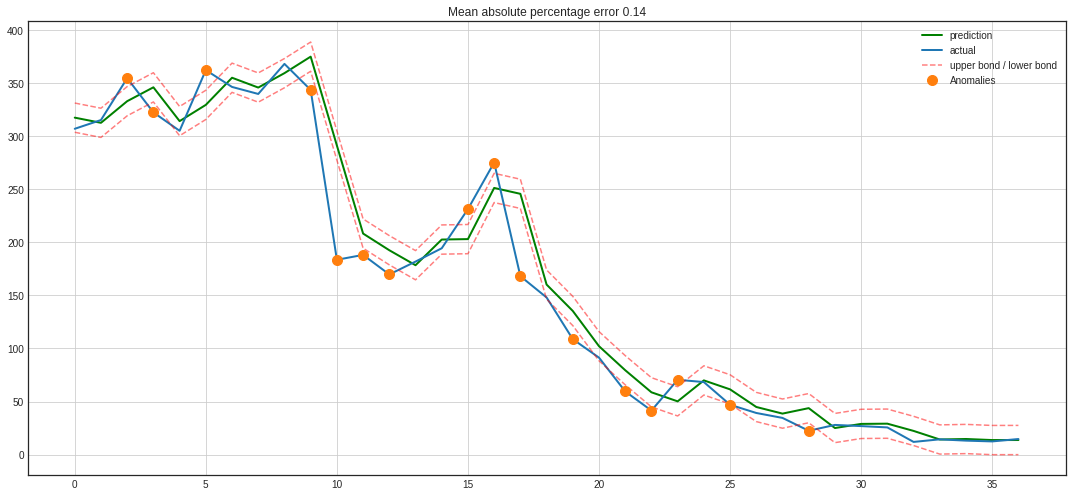

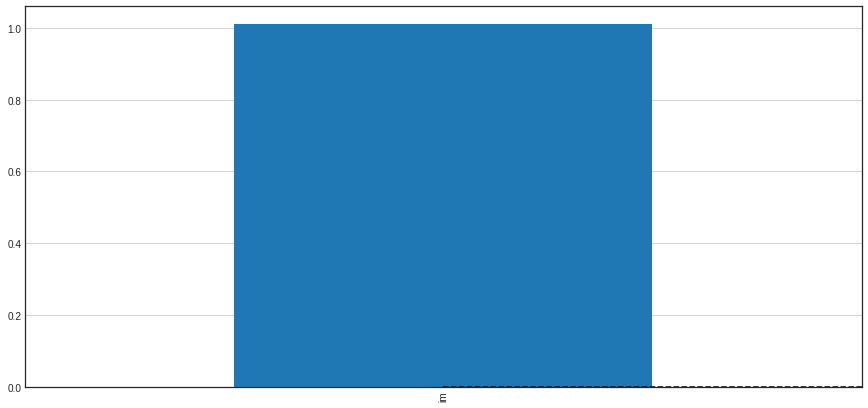

In [26]:
# initialize and fit lasso regression
lasso = LassoCV(cv=tscv)
lasso.fit(X_train, y_train)

plotModelResults(lasso, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

mean absolute error: 16.85

mean squared error: 712.36

root mean squared error: 26.69

r2_score: 0.96

mean absolute percentage error: 0.14





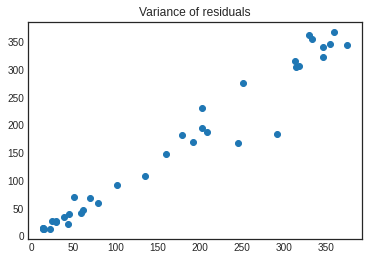

In [27]:
# make predictions
l_y_pred = lasso.predict(X_test)

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

**Implementing ridge regression**

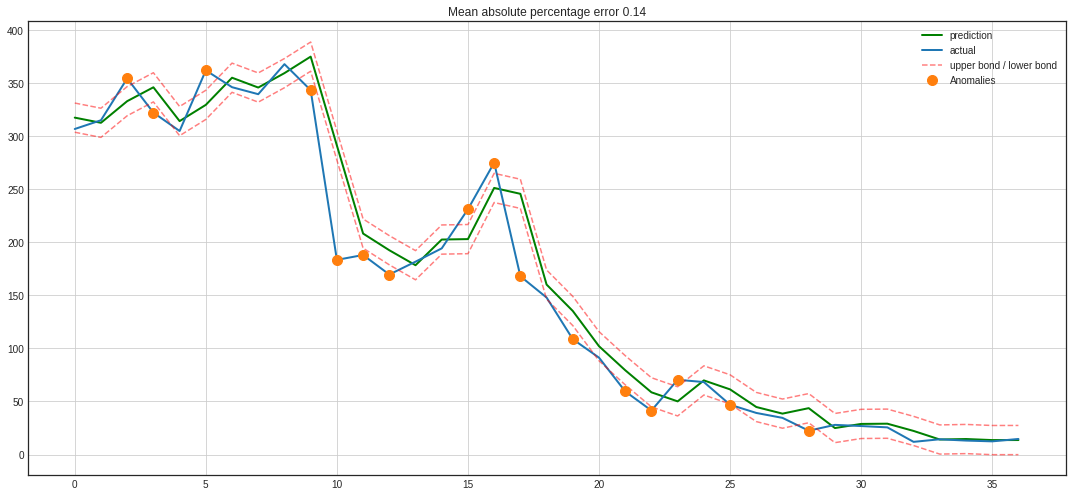

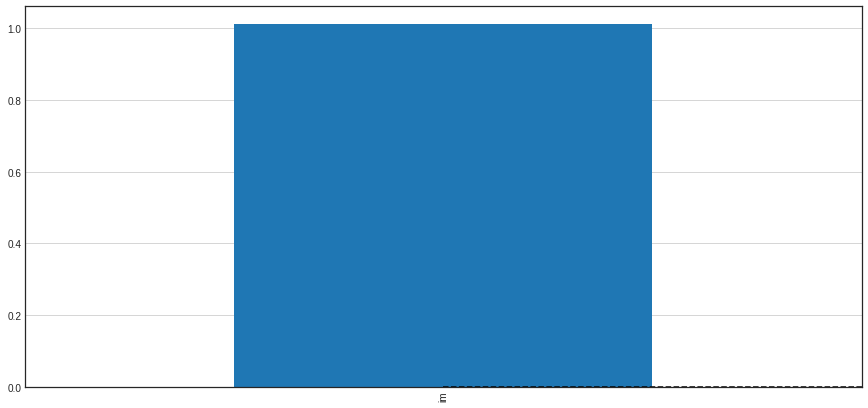

In [28]:
# initialize and fit ridge regression
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train, y_train)

plotModelResults(ridge, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

mean absolute error: 16.87

mean squared error: 714.41

root mean squared error: 26.73

r2_score: 0.96

mean absolute percentage error: 0.14





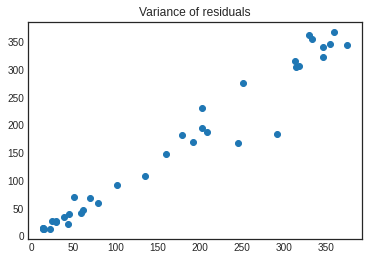

In [29]:
# make predictions
r_y_pred = ridge.predict(X_test)

# evaluate predictions
r_mae = round(mean_absolute_error(r_y_pred, y_test),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(r_y_pred, y_test),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(r_y_pred, y_test),2)
print('r2_score: {}\n'.format(r_r2))
r_mape = round(mean_absolute_percentage_error(r_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

# Check for homoscadacity
plt.scatter(r_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()


**Implementing elasticnet regression**

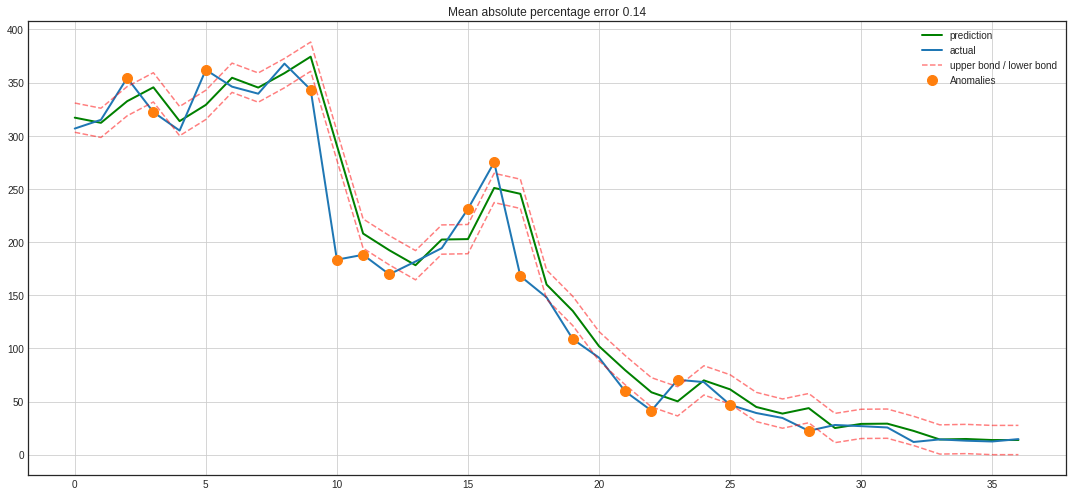

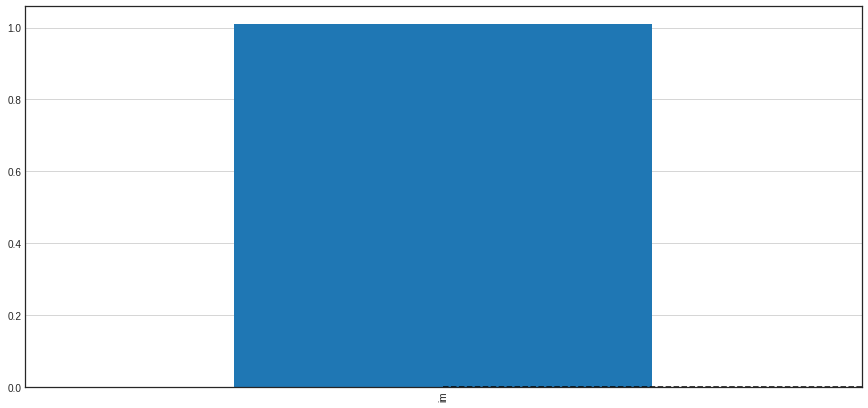

In [30]:
# initialize and fit elasticnet regression
elasticnet = ElasticNetCV(cv=tscv)
elasticnet.fit(X_train, y_train)

plotModelResults(elasticnet, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(elasticnet)

mean absolute error: 16.84

mean squared error: 710.32

root mean squared error: 26.65

r2_score: 0.96

mean absolute percentage error: 0.14





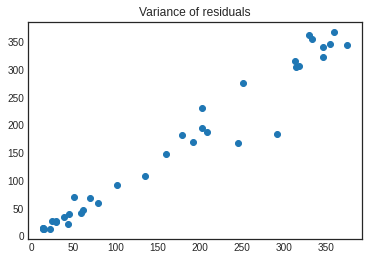

In [31]:
# make predictions
e_y_pred = elasticnet.predict(X_test)

# evaluate predictions
e_mae = round(mean_absolute_error(y_test, e_y_pred),2)
print('mean absolute error: {}\n'.format(e_mae))
e_mse = round(mean_squared_error(y_test, e_y_pred),2)
print('mean squared error: {}\n'.format(e_mse))
e_rmse = round(np.sqrt(e_mse),2)
print('root mean squared error: {}\n'.format(e_rmse))
e_r2 = round(r2_score(y_test, e_y_pred),2)
print('r2_score: {}\n'.format(e_r2))
e_mape = round(mean_absolute_percentage_error(e_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(e_mape))

# Check for homoscadacity
plt.scatter(e_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

**Summary**

In [32]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[lr_mae,r_mae,l_mae,e_mae], 'mse':[lr_mse,r_mse,l_mse,e_mse],'rmse':[lr_rmse,r_rmse,l_rmse,e_rmse],'r2_score':[lr_r2,r_r2,l_r2,e_r2],'mape':[lr_mape,r_mape,l_mape,e_mape]})
model_report 

,model,mae,mse,rmse,r2_score,mape
0,linear regression,16.87,714.43,26.73,0.96,0.14
1,ridge regression,16.87,714.41,26.73,0.96,0.14
2,lasso regression,16.85,712.36,26.69,0.96,0.14
3,elastic net regression,16.84,710.32,26.65,0.96,0.14


->From the given summary table we find that mae,mse,rmse are improved from linear regression to elastic net .

**Model pipeline:**

In [33]:
# set up the model pipeline
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    

**Holt's linear trend method (Double exponential smoothing)**

So far we were able to make just one prediction, clearly which is isn't enough. Double exponential smoothing (Holt's linear trend method) is one such way to overcome this limitation. It has two components, intercept  l  and slope  b 
ℓx=αyx+(1−α)(ℓx−1+bx−1) 
 bx=β(ℓx−ℓx−1)+(1−β)bx−1 
y^x+1=ℓx+ bx 
The final prediction is the sum of the model values of the intercept and trend.

In [38]:
# function that does double exponential smoothing
def double_exponential_smoothing(series, horizon, alpha, beta):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter for level
  beta - smoothing parameter for trend
  """
  # first value is same as series
  result = [series[0]]
  for n in range(1, len(series)+horizon):
      if n == 1:
          level, trend = series[0], series[1] - series[0]
      if n >= len(series): 
          value = result[-1]
      else:
          value = series[n]
      last_level, level = level, alpha*value + (1-alpha)*(level+trend)
      trend = beta*(level-last_level) + (1-beta)*trend
      result.append((level+trend).round(2))
  print(result[-horizon:])
  return result

In [39]:
# function to plot dema
def dema(series, horizon, alpha, beta):
    """
        Plots double exponential smoothing with different alphas and betas
        
        series - dataframe column with timeseries
        alphas - smoothing parameters for level
        betas - smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 5))
        plt.plot(double_exponential_smoothing(series, horizon, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

Stationarity

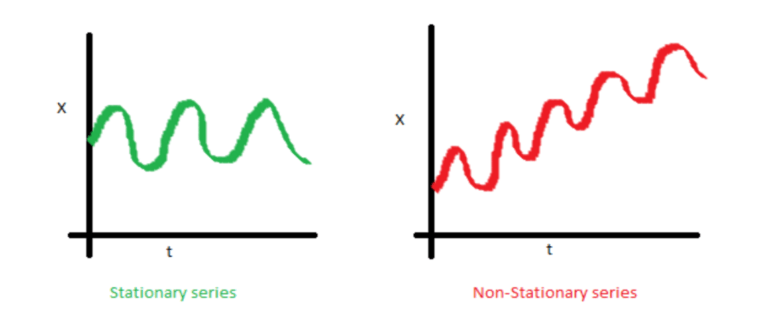

Any time series need to be stationary to make predictions. A process is said to be stationary if it's statistical properties like mean and variance don't change over time. One way to check for stationarity is through visual inspections or one can conduct a Dickey-Fuller test. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

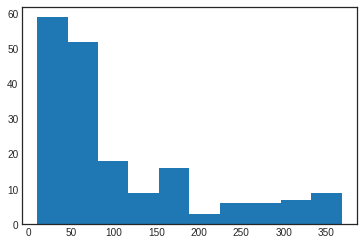

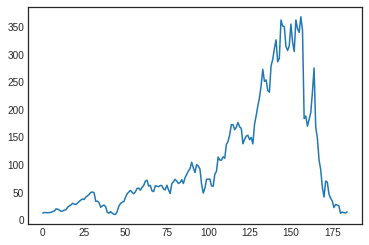

In [41]:
# visual inspection
X = dataset['Close']
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

In [42]:
# Implement Dickey-Fuller test
X = dataset['Close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.906409
p-value: 0.329052
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576


ADF statistic is greater than all our critical values, thus we have failed to reject the null hypothesis. It's confirmed that our time series model is not stationary. We'll make it stationary to build ARIMA model and then make future predictions.

**ARIMA Implementation**

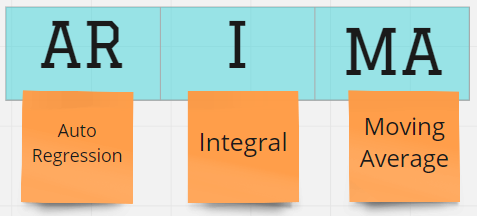

Getting rid of non stationarity

In [43]:
# function to take lags
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

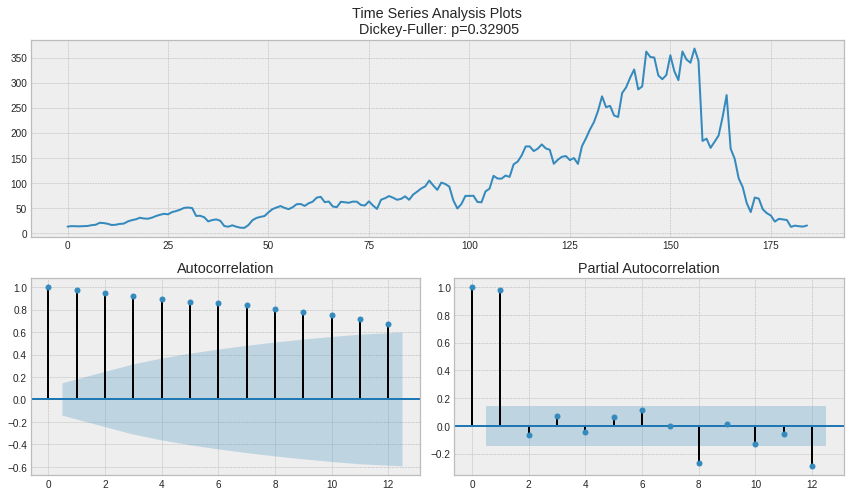

In [44]:
# plot to check stationarity
tsplot(dataset['Close'], lags=12)

The autocorrelation function still has too many significant lags. To remove them, we'll subtract the series from itself with lag 1

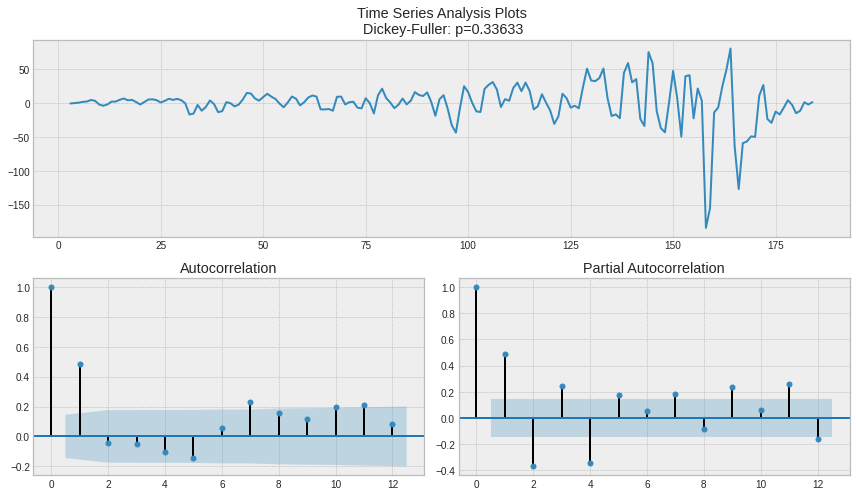

In [45]:
# differnce transform
diff = dataset['Close'] - dataset['Close'].shift(2)
tsplot(diff[3:], lags=12)

ARIMA - Parameters

p: Trend autoregression order 

d: Trend difference order.

q: Trend moving average order.

p  - is most probably 2 since it is the last significant lag on the PACF, after which, most others are not significant.

d  equals 1 because we had first differences

q  should be somewhere around 7 as well as seen on the ACF

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  180
Model:                 ARIMA(2, 1, 7)   Log Likelihood                -796.760
Method:                       css-mle   S.D. of innovations             19.459
Date:                Wed, 14 Dec 2022   AIC                           1615.521
Time:                        14:07:48   BIC                           1650.643
Sample:                             1   HQIC                          1629.761
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0692      0.053     -1.312      0.189      -0.173       0.034
ar.L1.D.Close     0.0495      0.057      0.862      0.389      -0.063       0.162
ar.L2.D.Close    -0.8507      0.049    -

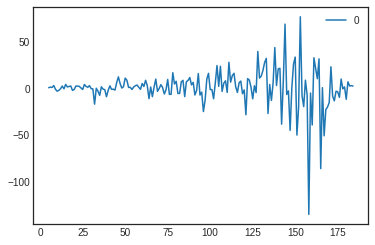

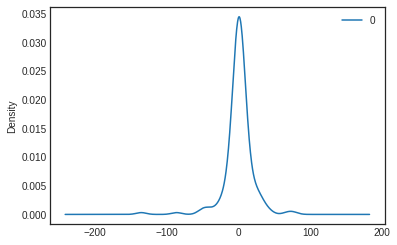

                0
count  180.000000
mean     0.699859
std     19.772918
min   -134.973361
25%     -3.872621
50%      1.353967
75%      7.002415
max     76.628469


In [46]:
# fit model
model = ARIMA(diff[4:], order=(2,1,7))
model = model.fit()

# summary of fit model
print(model.summary())

# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

In [47]:
# create series
diff = pd.Series(data=diff[5:])
diff1 = [0]*5
for i in diff:
  diff1.append(i*(-1)) 
diff1 = pd.Series(data=diff1)
diff1 = diff1[5:]

In [48]:
# plot MAPE of ARIMA
def plotARIMA(series, model, n_steps, d=1):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted ARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    # data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on d steps from the beginning
    error = mean_absolute_percentage_error(diff1[d:], data['arima_model'][d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.plot(diff1, label="actual")
    plt.legend()
    plt.grid(True);

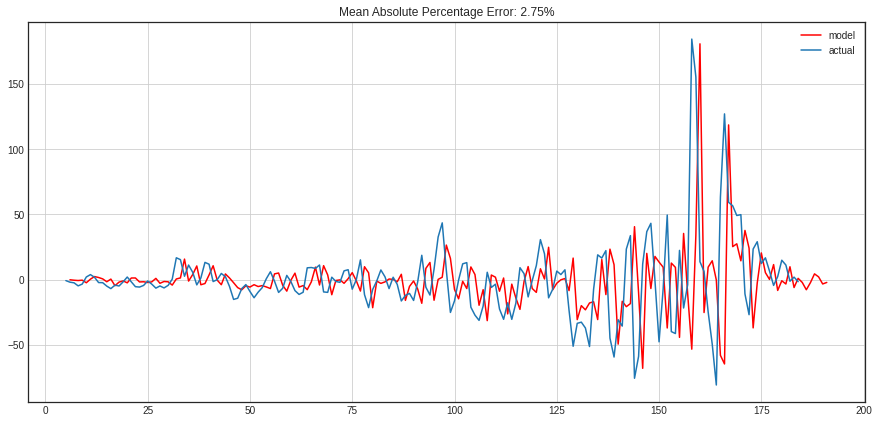

In [49]:
# model predictions vs actual
plotARIMA(diff1, model, 6)

# **Prophet Implementation**

In [50]:
# set data to train and test
dfp = dataset[['Date','Close']][175:]
split_date = '2020-05-01'
df_train = dfp.loc[dfp['Date'] <= split_date].copy()
df_test = dfp.loc[dfp['Date'] > split_date].copy()

In [51]:
# rename columns appropriately
df_train = df_train.rename(columns={'Date':'ds','Close':'y'})
df_test = df_test.rename(columns={'Date':'ds','Close':'y'})

In [52]:
# select appropriate columns
df_test = df_test.drop(columns=['y'], axis=1)
df_test.reset_index(inplace=True)
df_test.drop(columns=['index'], axis=1, inplace=True)

In [53]:
# Setup and fit the model
m = Prophet()
m.fit(df_train)

ValueError: ignored

In [54]:
# predicted closing prices
forecast = m.predict(df_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

Exception: ignored

In [55]:
# actual closing prices
dataset[179:][['Date','Close']]

,Date,Close
179,Jun-20,25.60
180,Jul-20,11.95
181,Aug-20,14.37
182,Sep-20,13.15
183,Oct-20,12.42
184,Nov-20,14.67


In [56]:
y_test = dataset[179:]['Close']
p_y_pred = forecast['yhat']

NameError: ignored

NameError: ignored

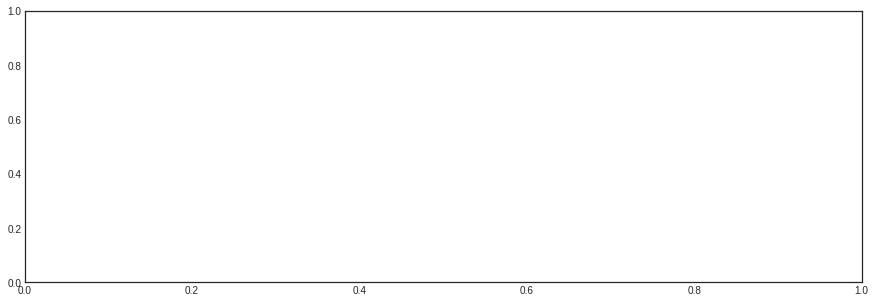

In [57]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = m.plot(forecast,
                 ax=ax)
plt.show()

# Plot the components of the model
fig = m.plot_components(forecast)

In [58]:
# evaluate predictions
p_mae = round(mean_absolute_error(y_test, p_y_pred),2)
print('mean absolute error: {}\n'.format(p_mae))
p_mse = round(mean_squared_error(y_test, p_y_pred),2)
print('mean squared error: {}\n'.format(p_mse))
p_rmse = round(np.sqrt(p_mse),2)
print('root mean squared error: {}\n'.format(p_rmse))
p_r2 = round(r2_score(y_test, p_y_pred),2)
print('r2_score: {}\n'.format(p_r2))
p_mape = round(mean_absolute_percentage_error(p_y_pred, y_test),2)
print('mean absolute percentage error: {}'.format(e_mape))

NameError: ignored

# **Conclusion**

-We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.

-A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.

-Additional features were engineered by taking lags and reduced the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.

-Regression models namely random forest regressor, xgboost regressor and support vector regressor were built.

-The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.

-Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.

-Prophet model from facebook was implemented and predictions were made from it.